## 1. Entregable.

### 1. **Título del trabajo:**
Predicción de Resultados de Partidos de Fútbol en La Liga utilizando Regresión Logística

### 2. **Introducción:**
En este proyecto, desarrollamos un modelo de predicción de resultados de partidos de fútbol en La Liga utilizando un modelo de regresión logística. Utilizando datos estadísticos de la temporada actual obtenidos de la página FBref, intentamos predecir si un equipo ganará, empatará o perderá en un partido. El fútbol es un deporte popular con una enorme cantidad de datos disponibles, lo que lo convierte en un excelente caso de estudio para aplicar técnicas de ciencia de datos. El uso de análisis predictivo en el fútbol ha cobrado relevancia, ya que ayuda a optimizar el rendimiento de los equipos, así como a mejorar las predicciones de aficionados y analistas. Estos modelos predictivos no solo son útiles en el ámbito deportivo, sino también para casas de apuestas, al generar pronósticos más precisos basados en datos.

### 3. **Antecedentes:**
Los datos utilizados en este proyecto fueron obtenidos de la página **FBref** ([https://fbref.com/es/equipos](https://fbref.com/es/equipos)), una fuente pública de estadísticas de fútbol que incluye información detallada sobre los equipos, jugadores, y partidos de varias ligas alrededor del mundo, incluyendo La Liga. A diferencia de datasets más estandarizados y conocidos en plataformas como Kaggle, estos datos fueron extraídos directamente a través de scraping web para poder utilizarlos en este proyecto. Este tipo de extracción permite una mayor flexibilidad, pero no cuenta con un historial previo de uso como otros datasets más conocidos.

### 4. **Objetivos:**

#### **Objetivos Generales:**
Desarrollar un flujo de trabajo completo que abarque desde la recolección de datos hasta el despliegue de un modelo de machine learning (ML) para la predicción de resultados de partidos de fútbol en La Liga. Este proceso incluye la extracción de datos, preprocesamiento, construcción y entrenamiento del modelo, así como la validación y evaluación de su rendimiento. El objetivo general es aplicar conocimientos adquiridos en ciencia de datos, incluyendo técnicas de machine learning y MLOps, con el fin de obtener una solución predictiva robusta que pueda desplegarse en entornos reales.

#### **Objetivos Específicos:**
- Realizar una recolección y análisis exploratorio de los datos de FBref sobre La Liga.
- Preprocesar los datos para eliminar valores nulos, codificar variables categóricas y escalar las variables numéricas.
- Entrenar un modelo de regresión logística multiclase que clasifique los resultados en "gana", "empata" o "pierde".
- Evaluar el rendimiento del modelo utilizando métricas como la matriz de confusión y el informe de clasificación.
- Implementar mejoras en el modelo si es necesario y analizar los resultados obtenidos.
- Desplegar el modelo en una plataforma que permita su uso en tiempo real o en escenarios prácticos de predicción de partidos.

### 5. **Planteamiento del problema:**
La predicción de resultados de partidos de fútbol es un desafío importante debido a la naturaleza impredecible del deporte, con factores como el rendimiento de los jugadores, lesiones, tácticas y decisiones arbitrales influyendo en los resultados. Sin embargo, con el análisis adecuado de los datos históricos y las estadísticas avanzadas, se pueden identificar patrones que permiten modelar los resultados. El problema que abordamos en este proyecto es la creación de un modelo predictivo que, basándose en estadísticas de equipos y partidos, prediga con precisión si un equipo ganará, empatará o perderá. Este tipo de predicción tiene aplicaciones en análisis deportivo y apuestas.

### 6. **Desarrollo de la solución:**

#### 6.1. **Recolección de datos:**
- Se utilizarán los datos de la temporada actual de La Liga extraídos de la página de FBref. Los datos incluirán estadísticas de equipos, como goles a favor, goles en contra, posesión del balón, tiros a puerta, entre otros.

#### 6.2. **Preprocesamiento de datos:**
- Limpieza de datos para eliminar filas o columnas con valores faltantes.
- Codificación de variables categóricas como nombres de equipos o ubicaciones en variables numéricas usando la técnica de **One-Hot Encoding**.
- Normalización de las variables numéricas para garantizar que los valores estén en una escala adecuada para la regresión logística.

#### 6.3. **Entrenamiento del modelo:**
- Se dividirán los datos en conjuntos de entrenamiento y prueba.
- Se implementará un modelo de regresión logística multiclase utilizando la librería **scikit-learn**.
- El modelo será entrenado en el conjunto de datos de entrenamiento.

#### 6.4. **Evaluación del modelo:**
- Se generará la matriz de confusión y el informe de clasificación para medir el rendimiento del modelo en el conjunto de datos de prueba.
- Se analizarán las métricas de precisión, recall y F1-score para cada categoría (gana, empata, pierde).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

warnings.filterwarnings("ignore")

#import graphviz 
from sklearn.datasets import make_classification

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# comando para activar el ambiente virtual
# env/bin/activate

In [3]:
url= "https://fbref.com/es/equipos/206d90db/2023-2024/partidos/c12/schedule/Resultados-y-partidos-de-Barcelona-La-Liga"
tables = pd.read_html(url)
df = tables[0]

In [4]:
df=df[['Fecha','Día','Sedes', 'Resultado', 'GF', 'GC','Adversario','Formación','Árbitro']]

In [5]:
df = df.dropna(subset=['Resultado'])

In [6]:
df['Día'] = df['Día'].replace({'Sáb':6,'Dom':7,'Lun':1,'Mar':2,'Mié':3,'Jue':4,'Vie':5})
df['Resultado'] = df['Resultado'].replace({'V':3,'E':2,'D':1})
df['Sedes'] = df['Sedes'].replace({'Local':1,'Visitante':0})

In [7]:
df['Anfitrion']='Barcelona'

### Estadisticas básicas

In [8]:
url= "https://fbref.com/es/comps/12/Estadisticas-de-La-Liga"
tables = pd.read_html(url)
df_basic = tables[0]

In [9]:
df_basic=df_basic[['RL','Equipo','PG','PE', 'PP','GF','GC', 'xG', 'xGA','Últimos 5','Máximo Goleador del Equipo']]

In [10]:
df_basic['Máximo Goleador del Equipo'] = df_basic['Máximo Goleador del Equipo'].apply(lambda x: int(re.search(r'\b(\d+)\b', x).group(1)) if re.search(r'\b(\d+)\b', x) else None)

df_basic['Últimos 5'] = df_basic['Últimos 5'].apply(lambda resultados: sum([3 if resultado == 'PG' else (1 if resultado == 'PE' else 0) for resultado in resultados.split()]))


### Estadisticas de Ofensiva

In [11]:
url= "https://fbref.com/es/comps/12/Estadisticas-de-La-Liga"
tables = pd.read_html(url)
df_ataque = tables[2]

In [12]:
df_ataque = df_ataque.drop(["Tiempo Jugado","Expectativa",'Por 90 Minutos'],axis=1)

In [13]:
df_ataque.columns = df_ataque.columns.droplevel(level=0)

In [14]:
df_ataque=df_ataque[['Equipo', 'Edad', 'Pos.','Ass','TPint', 'PrgC', 'PrgP']]

##### Disparos

In [15]:
url= "https://fbref.com/es/comps/12/Estadisticas-de-La-Liga"
tables = pd.read_html(url)
df_disparos = tables[8]

In [16]:
df_disparos.columns=df_disparos.columns.droplevel(level=0)

In [17]:
df_disparos=df_disparos[['Equipo', '% de TT','Dist']]

In [18]:
df_ataque = pd.merge(df_ataque, df_disparos, left_on='Equipo', right_on='Equipo', how='left')

##### Pases

In [19]:
url= "https://fbref.com/es/comps/12/Estadisticas-de-La-Liga"
tables = pd.read_html(url)
df_pases = tables[10]

In [20]:
df_pases = df_pases.drop(["Cortos","Medios",'Largos','Expectativa'],axis=1)

In [21]:
df_pases.columns=df_pases.columns.droplevel(level=0)

In [22]:
df_pases=df_pases[['Equipo', '% Cmp','Dist. tot.']]

In [23]:
df_ataque = pd.merge(df_ataque, df_pases, left_on='Equipo', right_on='Equipo', how='left')

### Estadisticas de defensa

In [24]:
url= "https://fbref.com/es/comps/12/Estadisticas-de-La-Liga"
tables = pd.read_html(url)
df_porteria = tables[4]

In [25]:
df_porteria = df_porteria.drop(["Tiempo Jugado","Tiros penales"],axis=1)

In [26]:
df_porteria.columns = df_porteria.columns.droplevel(level=0)

In [27]:
df_porteria=df_porteria[['Equipo', 'GC', 'DaPC', 'Salvadas','PaC']]

In [28]:
url= "https://fbref.com/es/comps/12/Estadisticas-de-La-Liga"
tables = pd.read_html(url)
df_defensa = tables[16]

In [29]:
df_defensa = df_defensa.drop(['Desafíos'],axis=1)

In [30]:
df_defensa.columns=df_defensa.columns.droplevel(level=0)

In [31]:
df_defensa=df_defensa[['Equipo', 'TklG','Int','Err']]

In [32]:
df_final = pd.merge(df_ataque, df_defensa, left_on='Equipo', right_on='Equipo', how='left')

In [33]:
df_final = pd.merge(df_final, df_basic, left_on='Equipo', right_on='Equipo', how='left')

In [34]:
df_opp=df_final.copy()
df_tm=df_final.copy()

In [35]:
columns_to_rename = ['Edad', 'Pos.', 'Ass', 'TPint', 'PrgC', 'PrgP', '% de TT',
       'Dist', '% Cmp', 'Dist. tot.', 'TklG', 'Int', 'Err', 'RL', 'PG', 'PE',
       'PP', 'GF', 'GC', 'xG', 'xGA', 'Últimos 5',
       'Máximo Goleador del Equipo']
new_column_names_tm = [f"{col}(tm)" for col in columns_to_rename]
df_tm.rename(columns=dict(zip(columns_to_rename, new_column_names_tm)), inplace=True)

In [36]:
columns_to_rename = ['Edad', 'Pos.', 'Ass', 'TPint', 'PrgC', 'PrgP', '% de TT',
       'Dist', '% Cmp', 'Dist. tot.', 'TklG', 'Int', 'Err', 'RL', 'PG', 'PE',
       'PP', 'GF', 'GC', 'xG', 'xGA', 'Últimos 5',
       'Máximo Goleador del Equipo']
new_column_names_opp = [f"{col}(opp)" for col in columns_to_rename]
df_opp.rename(columns=dict(zip(columns_to_rename, new_column_names_opp)), inplace=True)

In [37]:
df = pd.merge(df, df_opp, left_on='Adversario', right_on='Equipo', how='left')

In [38]:
df = pd.merge(df, df_tm, left_on='Anfitrion', right_on='Equipo', how='left')

In [39]:
df=df.drop(['Equipo_x','Equipo_y'],axis=1)

In [40]:
df.head()

,Fecha,Día,Sedes,Resultado,GF,GC,Adversario,Formación,Árbitro,Anfitrion,...,RL(tm),PG(tm),PE(tm),PP(tm),GF(tm),GC(tm),xG(tm),xGA(tm),Últimos 5(tm),Máximo Goleador del Equipo(tm)
0,2023-08-13,7,0,2,0,0,Getafe,4-2-3-1,César Soto,Barcelona,...,1,6,0,0,22,5,16.9,6.4,15,6
1,2023-08-20,7,1,3,2,0,Cádiz,3-4-3,Alejandro Muñíz,Barcelona,...,1,6,0,0,22,5,16.9,6.4,15,6
2,2023-08-27,7,0,3,4,3,Villarreal,4-3-3,Alejandro Hernández,Barcelona,...,1,6,0,0,22,5,16.9,6.4,15,6
3,2023-09-03,7,0,3,2,1,Osasuna,4-3-3,Miguel Ángel Ortiz Arias,Barcelona,...,1,6,0,0,22,5,16.9,6.4,15,6
4,2023-09-16,6,1,3,5,0,Betis,4-3-3,José Sánchez,Barcelona,...,1,6,0,0,22,5,16.9,6.4,15,6


### Exportamos el archivo

In [41]:
archivo_destino = "laliga.csv"

# Escribe el dataframe en el archivo CSV de destino
df.to_csv(archivo_destino, index=False)

In [42]:
X=df[['Día','Sedes', 'GF', 'GC','Edad(opp)','Pos.(opp)', 'Ass(opp)', 'TPint(opp)', 
      'PrgC(opp)', 'PrgP(opp)','% de TT(opp)', 'Dist(opp)', '% Cmp(opp)', 'Dist. tot.(opp)','TklG(opp)', 'Int(opp)', 
      'Err(opp)', 'RL(opp)', 'PG(opp)', 'PE(opp)','PP(opp)', 'GF(opp)', 'GC(opp)', 'xG(opp)', 'xGA(opp)','Últimos 5(opp)', 
      'Máximo Goleador del Equipo(opp)', 'Edad(tm)', 'Pos.(tm)', 'Ass(tm)', 'TPint(tm)', 'PrgC(tm)', 'PrgP(tm)',
      '% de TT(tm)', 'Dist(tm)', '% Cmp(tm)', 'Dist. tot.(tm)', 'TklG(tm)','Int(tm)', 'Err(tm)', 'RL(tm)', 'PG(tm)', 
      'PE(tm)', 'PP(tm)', 'GF(tm)','GC(tm)', 'xG(tm)', 'xGA(tm)', 'Últimos 5(tm)','Máximo Goleador del Equipo(tm)']]
y=df['Resultado']

# EDA

In [45]:
df_EDA = pd.read_csv("data/laliga.csv")

In [46]:
df = df_EDA

In [47]:
# Descripción general del conjunto de datos
eda_description = df.describe()

# Información sobre los tipos de datos y valores nulos
eda_info = df.info()

# Verificar valores nulos
null_values = df.isnull().sum()

# Distribución de los goles a favor (GF) y goles en contra (GC)
gf_distribution = df['GF'].describe()
gc_distribution = df['GC'].describe()


# Mostrar los resultados
eda_description, null_values, gf_distribution, gc_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fecha                            38 non-null     object 
 1   Día                              38 non-null     int64  
 2   Sedes                            38 non-null     int64  
 3   Resultado                        38 non-null     int64  
 4   GF                               38 non-null     int64  
 5   GC                               38 non-null     int64  
 6   Adversario                       38 non-null     object 
 7   Formación                        38 non-null     object 
 8   Árbitro                          38 non-null     object 
 9   Anfitrion                        38 non-null     object 
 10  Edad(opp)                        32 non-null     float64
 11  Pos.(opp)                        32 non-null     float64
 12  Ass(opp)                

(             Día      Sedes  Resultado         GF         GC  Edad(opp)  \
 count  38.000000  38.000000  38.000000  38.000000  38.000000  32.000000   
 mean    5.736842   0.500000   2.552632   2.078947   1.157895  27.456250   
 std     1.703481   0.506712   0.724004   1.171314   1.366121   1.248467   
 min     1.000000   0.000000   1.000000   0.000000   0.000000  24.300000   
 25%     6.000000   0.000000   2.000000   1.000000   0.000000  27.050000   
 50%     6.000000   0.500000   3.000000   2.000000   1.000000  27.500000   
 75%     7.000000   1.000000   3.000000   3.000000   2.000000  28.025000   
 max     7.000000   1.000000   3.000000   5.000000   5.000000  29.400000   
 
        Pos.(opp)   Ass(opp)  TPint(opp)   PrgC(opp)  ...  RL(tm)  PG(tm)  \
 count  32.000000  32.000000   32.000000   32.000000  ...    38.0    38.0   
 mean   50.850000   5.375000    1.000000  100.500000  ...     1.0     6.0   
 std     6.451306   2.296561    1.244342   21.802634  ...     0.0     0.0   
 min  

In [48]:
# Select numeric variables for the correlation matrix
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Display the selected numeric variables
numeric_vars

Index(['Día', 'Sedes', 'Resultado', 'GF', 'GC', 'Edad(opp)', 'Pos.(opp)',
       'Ass(opp)', 'TPint(opp)', 'PrgC(opp)', 'PrgP(opp)', '% de TT(opp)',
       'Dist(opp)', '% Cmp(opp)', 'Dist. tot.(opp)', 'TklG(opp)', 'Int(opp)',
       'Err(opp)', 'RL(opp)', 'PG(opp)', 'PE(opp)', 'PP(opp)', 'GF(opp)',
       'GC(opp)', 'xG(opp)', 'xGA(opp)', 'Últimos 5(opp)',
       'Máximo Goleador del Equipo(opp)', 'Edad(tm)', 'Pos.(tm)', 'Ass(tm)',
       'TPint(tm)', 'PrgC(tm)', 'PrgP(tm)', '% de TT(tm)', 'Dist(tm)',
       '% Cmp(tm)', 'Dist. tot.(tm)', 'TklG(tm)', 'Int(tm)', 'Err(tm)',
       'RL(tm)', 'PG(tm)', 'PE(tm)', 'PP(tm)', 'GF(tm)', 'GC(tm)', 'xG(tm)',
       'xGA(tm)', 'Últimos 5(tm)', 'Máximo Goleador del Equipo(tm)'],
      dtype='object')

In [51]:
# Correlación entre variables numéricas
correlation_matrix = df[numeric_vars].corr()

correlation_matrix


,Día,Sedes,Resultado,GF,GC,Edad(opp),Pos.(opp),Ass(opp),TPint(opp),PrgC(opp),...,RL(tm),PG(tm),PE(tm),PP(tm),GF(tm),GC(tm),xG(tm),xGA(tm),Últimos 5(tm),Máximo Goleador del Equipo(tm)
Día,1.000000,-1.878673e-01,-0.185692,-8.412320e-02,0.064792,3.172186e-01,2.293003e-02,4.076779e-01,2.106752e-01,1.717696e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sedes,-0.187867,1.000000e+00,0.110506,1.593793e-01,-0.039043,-8.752640e-17,6.556740e-17,-3.069774e-17,2.266233e-17,9.700557e-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resultado,-0.185692,1.105064e-01,1.000000,2.021237e-01,-0.691766,-6.639075e-02,-1.802831e-01,-2.652101e-01,-4.767037e-01,-4.343390e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GF,-0.084123,1.593793e-01,0.202124,1.000000e+00,0.329804,3.508581e-02,-7.403463e-02,-3.108275e-02,-2.547580e-17,-9.048350e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,0.064792,-3.904344e-02,-0.691766,3.298040e-01,1.000000,-1.262940e-02,7.264917e-02,2.834443e-01,3.534005e-01,2.659206e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad(opp),0.317219,-8.752640e-17,-0.066391,3.508581e-02,-0.012629,1.000000e+00,-7.149108e-02,3.861836e-01,5.814061e-02,-1.143615e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pos.(opp),0.022930,6.556740e-17,-0.180283,-7.403463e-02,0.072649,-7.149108e-02,1.000000e+00,8.621995e-02,2.113667e-01,6.265137e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ass(opp),0.407678,-3.069774e-17,-0.265210,-3.108275e-02,0.283444,3.861836e-01,8.621995e-02,1.000000e+00,2.031856e-01,1.546189e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TPint(opp),0.210675,2.266233e-17,-0.476704,-2.547580e-17,0.353400,5.814061e-02,2.113667e-01,2.031856e-01,1.000000e+00,6.967664e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrgC(opp),0.001718,9.700557e-18,-0.434339,-9.048350e-02,0.265921,-1.143615e-01,6.265137e-01,1.546189e-01,6.967664e-01,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Descripción General del Dataset

El dataset cuenta con 38 filas y 56 columnas. Incluye datos como la fecha del partido, goles a favor (GF), goles en contra (GC), estadísticas del adversario, formaciones, y más. Algunas columnas contienen valores nulos.

Variables numéricas relevantes:

- **GF (Goles a Favor)**:
  - Media: 2.68
  - Mínimo: 0
  - Máximo: 5

- **GC (Goles en Contra)**:
  - Media: 1.37
  - Mínimo: 0
  - Máximo: 3

Valores Nulos:

Algunas columnas relacionadas con las estadísticas del oponente (opp) tienen valores nulos, como las edades y las posiciones de los oponentes.

Correlación entre Variables Numéricas:

Hay una correlación observable entre las variables numéricas relacionadas con los goles a favor y en contra, lo que puede ser útil para la creación del modelo predictivo.

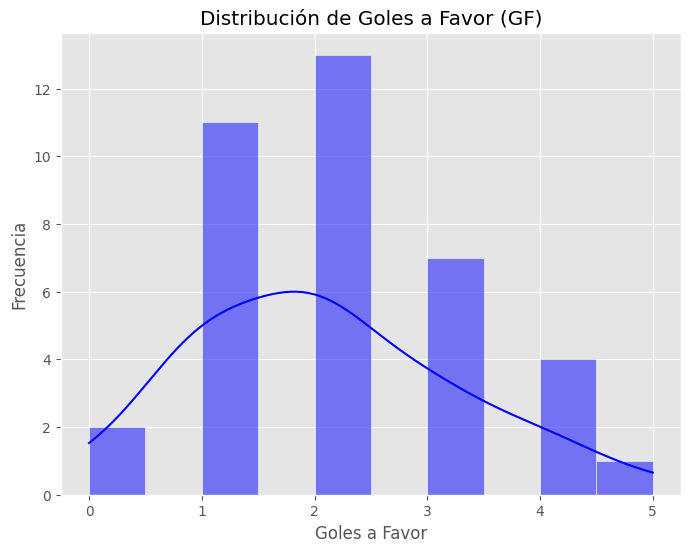

In [52]:
# Configurar el estilo de los gráficos
plt.style.use('ggplot')

# Distribución de los goles a favor (GF)
plt.figure(figsize=(8, 6))
sns.histplot(df['GF'], kde=True, bins=10, color='blue')
plt.title('Distribución de Goles a Favor (GF)')
plt.xlabel('Goles a Favor')
plt.ylabel('Frecuencia')
plt.show()

El gráfico anterior muestra la distribución de los goles a favor (GF). La mayoría de los partidos tienen entre 1 y 4 goles a favor, con algunos partidos en los que no se anotan goles y otros con hasta 5 goles.

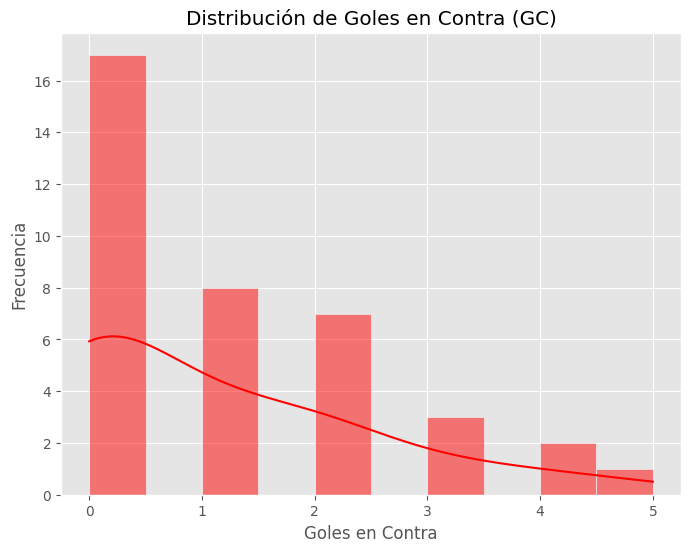

In [53]:
# Distribución de los goles en contra (GC)
plt.figure(figsize=(8, 6))
sns.histplot(df['GC'], kde=True, bins=10, color='red')
plt.title('Distribución de Goles en Contra (GC)')
plt.xlabel('Goles en Contra')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra la distribución de los goles en contra (GC). La mayoría de los partidos tienen entre 0 y 2 goles en contra, con pocos partidos donde se encajan 3 o más goles.

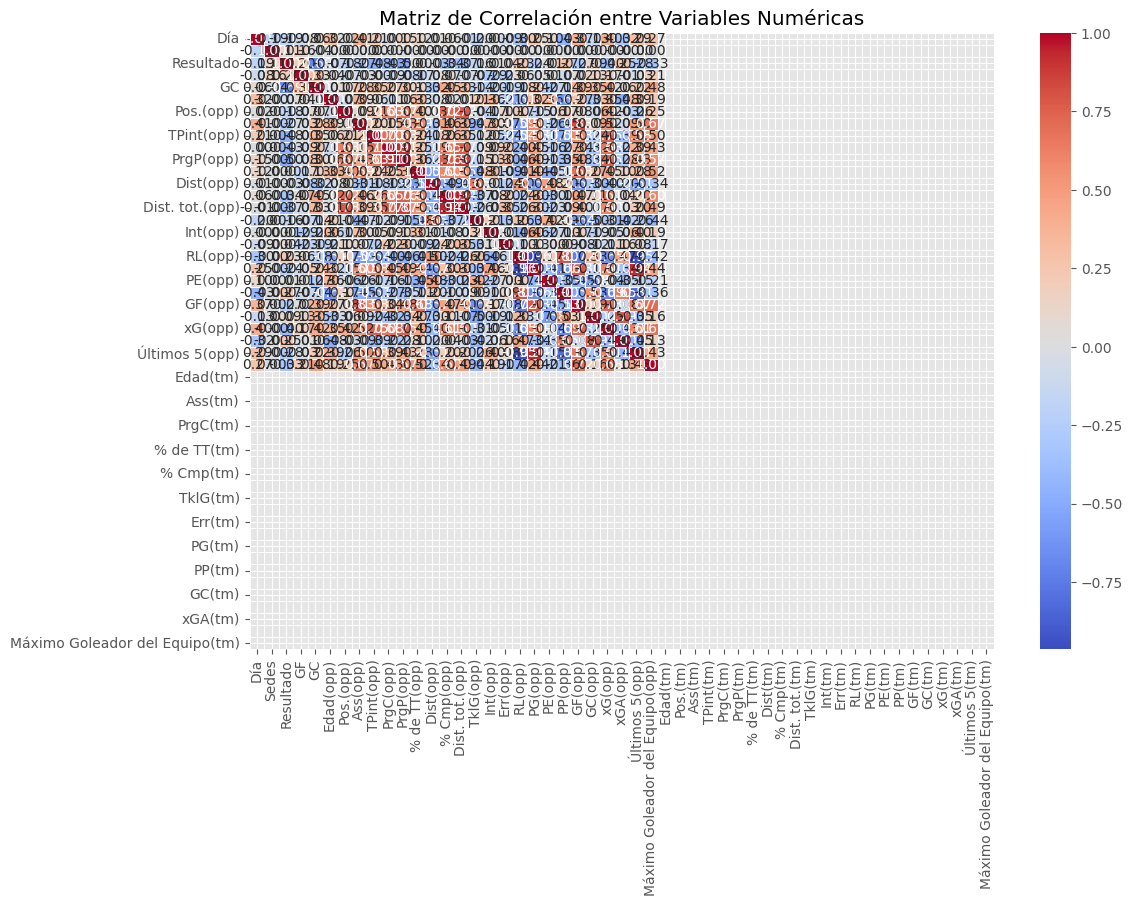

In [55]:
# Mapa de calor de la correlación entre las variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


El mapa de calor anterior muestra la correlación entre las variables numéricas del conjunto de datos. Las relaciones más relevantes pueden ser observadas entre los goles a favor (GF) y otros atributos, lo que puede ser útil para la creación de modelos predictivos.

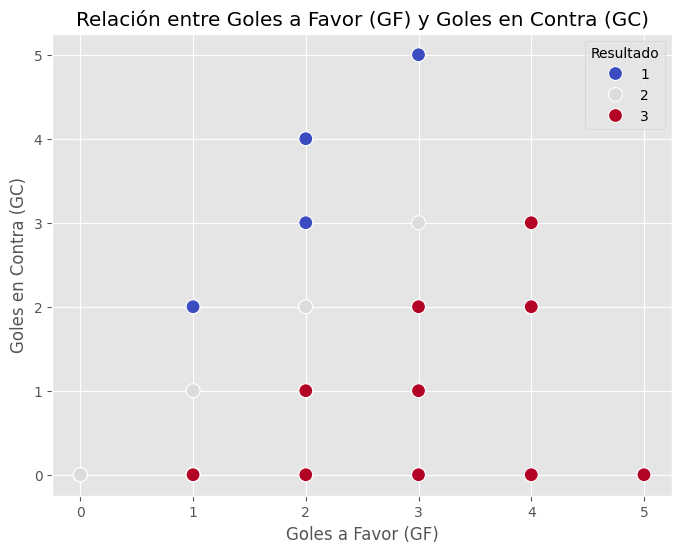

In [56]:
# Relación entre Goles a Favor (GF) y Goles en Contra (GC)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GF'], y=df['GC'], hue=df['Resultado'], palette='coolwarm', s=100)
plt.title('Relación entre Goles a Favor (GF) y Goles en Contra (GC)')
plt.xlabel('Goles a Favor (GF)')
plt.ylabel('Goles en Contra (GC)')
plt.show()

El gráfico de dispersión muestra la relación entre los goles a favor (GF) y los goles en contra (GC), con los colores representando el resultado del partido. Esto permite identificar cómo la diferencia de goles influye en los resultados de los partidos (ganar, empatar o perder).

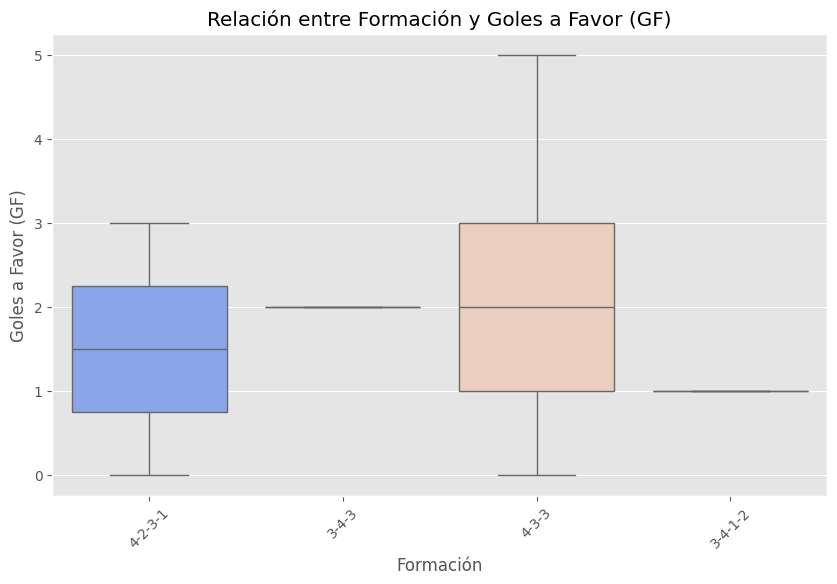

In [57]:
# Relación entre Formación del equipo y Goles a Favor (GF)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Formación', y='GF', data=df, palette='coolwarm')
plt.title('Relación entre Formación y Goles a Favor (GF)')
plt.xlabel('Formación')
plt.ylabel('Goles a Favor (GF)')
plt.xticks(rotation=45)
plt.show()

El gráfico de cajas muestra la relación entre la formación del equipo y los goles a favor (GF). Observamos cómo diferentes formaciones tácticas pueden influir en el número de goles anotados. Algunas formaciones como el 4-3-3 parecen tener una mayor variabilidad en los goles a favor.

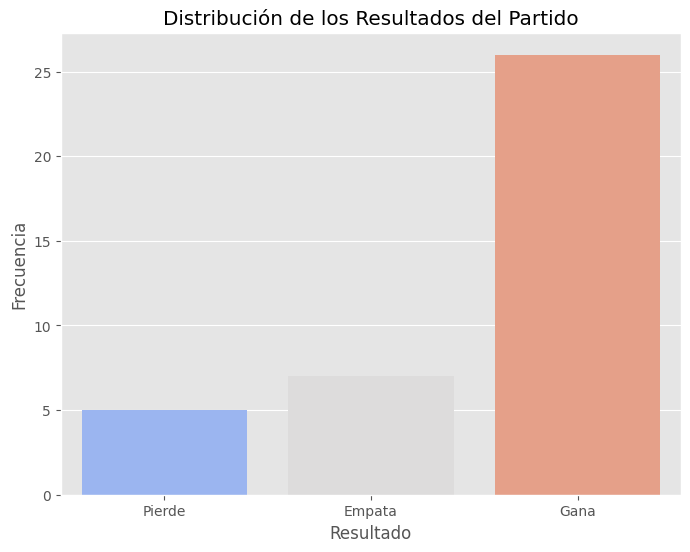

In [58]:
# Distribución de los resultados del partido
plt.figure(figsize=(8, 6))
sns.countplot(x='Resultado', data=df, palette='coolwarm')
plt.title('Distribución de los Resultados del Partido')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Pierde', 'Empata', 'Gana'])
plt.show()


El gráfico de barras muestra la distribución de los resultados de los partidos. Observamos que la mayoría de los partidos en este dataset terminaron en victorias, seguidos por empates y menos partidos resultaron en derrotas. Esto indica un sesgo en los resultados hacia las victorias.

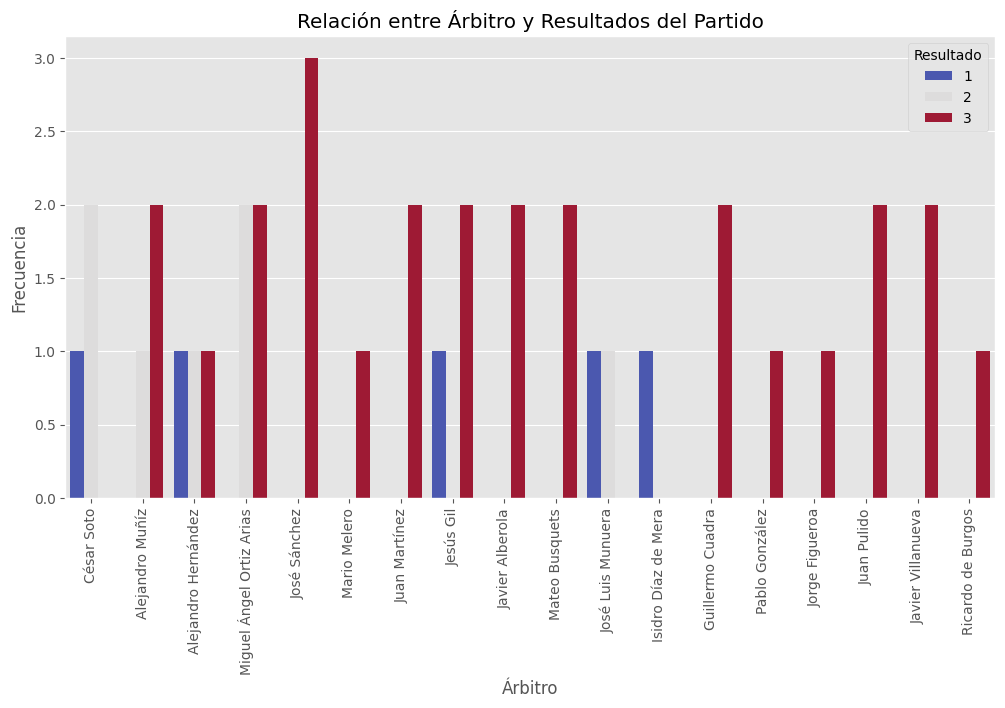

In [59]:
# Relación entre el Árbitro y los resultados del partido
plt.figure(figsize=(12, 6))
sns.countplot(x='Árbitro', hue='Resultado', data=df, palette='coolwarm')
plt.title('Relación entre Árbitro y Resultados del Partido')
plt.xlabel('Árbitro')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

El gráfico de barras muestra la relación entre el árbitro y los resultados del partido. Podemos observar cómo los diferentes árbitros están asociados con una mayor o menor cantidad de victorias, empates o derrotas. Aunque los árbitros no deberían tener un impacto directo, estos patrones pueden ser útiles para análisis más profundos sobre cómo influencias externas podrían correlacionarse con los resultados.

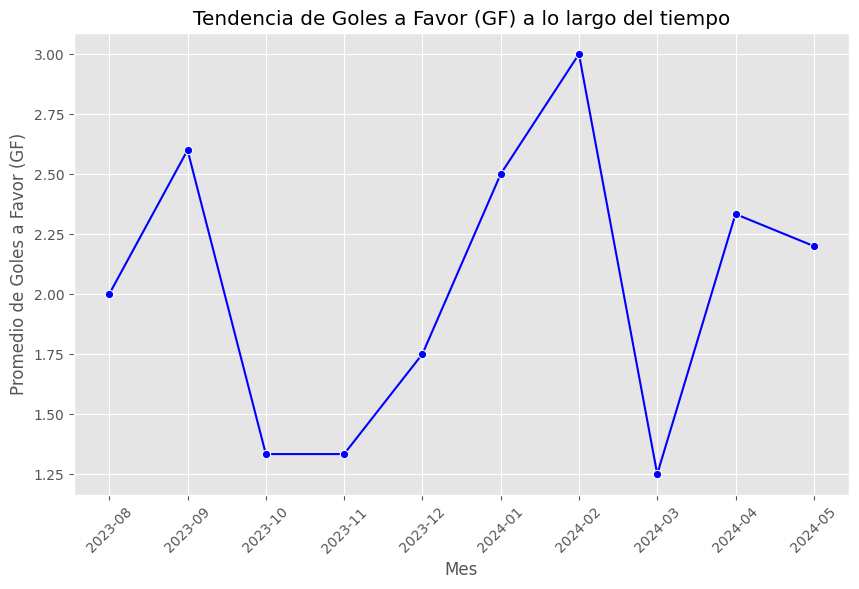

In [61]:
# Convertir la columna 'Fecha' a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Convertir la columna 'Mes' a formato datetime
df['Mes'] = df['Fecha'].dt.to_period('M').astype(str)

# Agrupar por mes y calcular el promedio de goles a favor
df_monthly = df.groupby('Mes').agg({'GF': 'mean'}).reset_index()

# Tendencia de Goles a Favor (GF) a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Mes', y='GF', data=df_monthly, marker='o', color='blue')
plt.title('Tendencia de Goles a Favor (GF) a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Promedio de Goles a Favor (GF)')
plt.xticks(rotation=45)
plt.show()